In [68]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('Placement.csv')

In [3]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
dataset[dataset.isnull().any(axis=1)]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary


# 1.Replace the NaN values with correct value
#replacing the values null salary values to 0

In [7]:

dataset["salary"].fillna(0,inplace=True)

Answer: 
Only Salary is having null values , so it is replaced with 0

# 2. students who have not placed

In [9]:
dataset['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

# Answer: 
# 67 students have not been placed

# 3. Reason for non-placement from the dataset

In [11]:
dataset[dataset['status']=='Not Placed']

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,0.0
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,0.0
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,0.0


In [56]:
dataset.groupby('status')['mba_p'].mean()

status
Not Placed    61.612836
Placed        62.579392
Name: mba_p, dtype: float64

In [57]:
dataset.groupby('status')['ssc_p'].mean()

status
Not Placed    57.544030
Placed        71.721486
Name: ssc_p, dtype: float64

In [58]:
dataset.groupby('status')['hsc_p'].mean()

status
Not Placed    58.395522
Placed        69.926554
Name: hsc_p, dtype: float64

In [59]:
dataset.groupby('status')['etest_p'].mean()

status
Not Placed    69.587910
Placed        73.238041
Name: etest_p, dtype: float64

# Answer:
# For the 67 students who have not placed their ssc_p , hsc_p , etest_p and mba_p marks are low
# So they have not placed

# 4. Relation between salary and mba_p

In [13]:
dataset['mba_p'].corr(dataset['salary'])

0.13982273892615557

# Answer: 
# Mba mark is directly proportional to Salary

# 5. Which specialization is getting minimum salary?

In [47]:
dataset.groupby('specialisation')['salary'].mean()

specialisation
Mkt&Fin    236591.666667
Mkt&HR     150842.105263
Name: salary, dtype: float64

# Answer:
# Mkt&HR specialisation is getting minimum salary

# 6.How many of them getting above 500000 salaries?

In [16]:
dataset[dataset['salary'] > 500000]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,151,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,178,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


# Answer: 
# Only 3 persons are getting salary above 500000

# 7. Test the Analysis of Variance between etest_p and mba_p at signifance level 5%. 
# (Make decision using Hypothesis Testing)


# Null hypothesis - there is no similarity between etest_p and mba_p marks 

In [19]:
import scipy.stats as stats

In [20]:
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

# Answer:
# Reject null hypothesis if p < 0.05, here p is greater
# 4.672 > 0.05
# So reject alternate hypothesis and accept null hypothesis
# So there is no similarity between etest_p and mba_p marks 

# 8. finding the similarity between degree_t [Sci&Tech] and specialization[Mkt&HR] with salary
# different group degree_t [Sci&Tech] and specialization[Mkt&HR]
# condition [salary]

In [24]:
dataset['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

# Null hypothesis - there is no similarity between Sci&Tech and Mkt&HR salary

In [26]:
from scipy.stats import ttest_ind
degree_science = dataset[dataset['degree_t'] == 'Sci&Tech']['salary']
specialisation_mkt = dataset[dataset['specialisation'] == 'Mkt&HR']['salary']
ttest_ind(degree_science,specialisation_mkt)

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

# Answer :
# Reject null hypothesis if p < 0.05, here p is lesser
# 0.007 < 0.05
# So reject null hypothesis
# So there is similarity between Sci&Tech and Mkt&HR salary

# 9. Convert the normal distribution to standard normal distribution for salary column

In [34]:
import piplite
await piplite.install('seaborn')

In [35]:
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm

In [36]:
#convert to normal standard distribution
def stdNB(dataset):
    #mean function is used to find the mean and stored in mean variable
    mean = dataset.mean()
    #std function is used to find the standard deviation and stored in std variable
    std = dataset.std()
    #passing the values of the dataset and storing in list
    values = [i for i in dataset]
    #z_score calculation using mean and std
    z_score = [((j - mean)/std) for j in values]
    #plotting the standard normal distribution curve
    sns.displot(z_score,kde = True) 
    sum(z_score)/len(z_score)

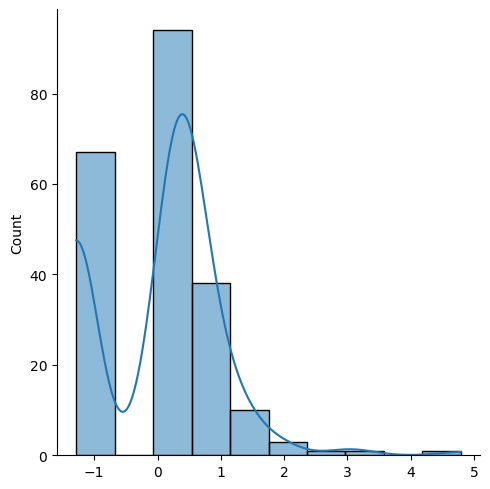

In [37]:
stdNB(dataset['salary'])

# 10. What is the probability Density Function of the salary range from 700000 to 900000?

In [39]:
def pdf_probability(dataset,startrange,endrange):
    #distplot function arguments- 
    #dataset is given
    #kernel density function to get curve, to be in blue color
    #histogram color in green color
    ax = sns.distplot(dataset,kde = True,kde_kws = {'color':'blue'},color='Green')
    # the axvline indicates vertical line , 
    #arguments - start range of the line, color in red
    pyplot.axvline(startrange,color = 'Red')
    # the axvline indicates vertical line , 
    #arguments - end range of the line, color in red
    pyplot.axvline(endrange,color = 'Red')

    sample = dataset
    #finding the mean using mean() function and stored in sample_mean variable
    sample_mean = sample.mean()
    #finding the standard deviation using std() function and stored in sample_std variable
    sample_std = sample.std()
    print('mean=%.3f, Standard Deviation = %.3f' % (sample_mean,sample_std))
    #creates the distribution , mean and std are passed in norm function
    dist = norm(sample_mean,sample_std)
    #range function takes start and end range
    #the values stored in value list
    values = [value for value in range(startrange,endrange)]
    #value list is passed in dist.pdf function
    probabilities = [dist.pdf(value) for value in values]
    #finding the summation
    prob = sum(probabilities)
    print('Area between range({},{}) :{}'.format(startrange,endrange,sum(probabilities)))
    return prob

<ipython-input-39-7f56522d105b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde = True,kde_kws = {'color':'blue'},color='Green')


mean=198702.326, Standard Deviation = 154780.927
Area between range(700000,900000) :0.0005973310593974868


0.0005973310593974868

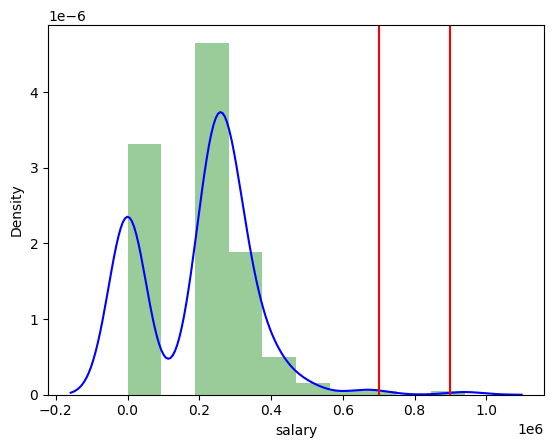

In [40]:
pdf_probability(dataset['salary'],700000,900000)

# 11.Test the similarity between the degree_t(Sci&Tech) with respect to etest_p and mba_p at significance level of 5%

# Null hypothesis - there is no similarity between Sci&Tech etest_p and mba_p

# we need to use dependent sample Paired T test
# same group [degree_t - Sci&Tech] 
# different condition [etest_p,mba_p]

In [ ]:

from scipy.stats import ttest_rel
scitech = dataset[dataset['degree_t'] == 'Sci&Tech']['etest_p']
scitech1 = dataset[dataset['degree_t'] == 'Sci&Tech']['mba_p']
ttest_rel(scitech,scitech1)

# Answer :
# Here p value is 5.5, which is greater than 0.05
# So accept null hypothesis
# So There is no similarity between Sci&Tech etest_p and mba_p

# 12. Which parameter is highly correlated with salary

In [45]:
dataset.corr(numeric_only = True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


# Answer:
# ssc_p is highly related with salary

# 13. Plot any useful graph and explain it

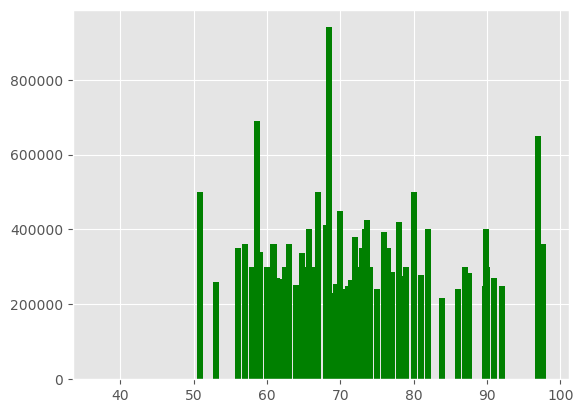

In [84]:
pyplot.bar(dataset['hsc_p'],dataset['salary'] , color='green')

# Show the plot
pyplot.show()

# Answer
# The salary is between 2lakh and 4.5 lakh for most of the avg students